In [36]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [37]:
dataset = pd.read_csv('F:/Study Materials/4 - 2/AI/AQI_dataset/aqi_dataset.csv')

In [38]:
dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28469,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
28470,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
28471,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
28472,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [39]:
dataset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,23920.000000,17465.000000,25011.000000,24966.000000,24330.000000,18335.000000,26452.000000,24674.000000,24526.000000,22964.000000,20635.000000,11239.000000,23894.000000
mean,69.095223,121.578966,17.857667,28.959424,32.737994,23.894052,2.306848,14.758950,34.519763,3.310998,8.918763,3.063745,170.145811
std,65.389862,90.987310,22.585057,24.655411,31.809871,26.087108,7.088831,18.442412,21.763107,16.001572,20.241362,6.356428,142.084468
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.937500,59.900000,5.760000,11.982500,12.900000,8.710000,0.520000,5.640000,18.872500,0.150000,0.710000,0.140000,83.000000
50%,50.215000,98.820000,10.080000,22.110000,23.910000,16.170000,0.905000,9.220000,30.835000,1.120000,3.100000,0.980000,121.000000
75%,82.557500,152.970000,20.450000,38.050000,40.807500,30.445000,1.470000,15.560000,45.540000,3.160000,9.360000,3.340000,215.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [40]:
dataset.isnull().sum()

City              0
Date              0
PM2.5          4554
PM10          11009
NO             3463
NO2            3508
NOx            4144
NH3           10139
CO             2022
SO2            3800
O3             3948
Benzene        5510
Toluene        7839
Xylene        17235
AQI            4580
AQI_Bucket     4580
dtype: int64

In [41]:
dataset = dataset.fillna(dataset.mean())

In [42]:
dataset.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4580
dtype: int64

In [43]:
df = pd.DataFrame(dataset)

In [44]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,69.095223,121.578966,0.92,18.22,17.15,23.894052,0.92,27.64,133.36,0.000000,0.020000,0.000000,170.145811,NaN
1,Ahmedabad,2015-01-02,69.095223,121.578966,0.97,15.69,16.46,23.894052,0.97,24.55,34.06,3.680000,5.500000,3.770000,170.145811,NaN
2,Ahmedabad,2015-01-03,69.095223,121.578966,17.40,19.30,29.70,23.894052,17.40,29.07,30.70,6.800000,16.400000,2.250000,170.145811,NaN
3,Ahmedabad,2015-01-04,69.095223,121.578966,1.70,18.48,17.97,23.894052,1.70,18.59,36.08,4.430000,10.140000,1.000000,170.145811,NaN
4,Ahmedabad,2015-01-05,69.095223,121.578966,22.10,21.42,37.76,23.894052,22.10,39.33,39.31,7.010000,18.890000,2.780000,170.145811,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28469,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
28470,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
28471,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory
28472,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.000000,Satisfactory


In [45]:
del df['City']

In [46]:
del df['Date']

In [47]:
del df['AQI_Bucket']

In [48]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,69.095223,121.578966,0.92,18.22,17.15,23.894052,0.92,27.64,133.36,0.000000,0.020000,0.000000,170.145811
1,69.095223,121.578966,0.97,15.69,16.46,23.894052,0.97,24.55,34.06,3.680000,5.500000,3.770000,170.145811
2,69.095223,121.578966,17.40,19.30,29.70,23.894052,17.40,29.07,30.70,6.800000,16.400000,2.250000,170.145811
3,69.095223,121.578966,1.70,18.48,17.97,23.894052,1.70,18.59,36.08,4.430000,10.140000,1.000000,170.145811
4,69.095223,121.578966,22.10,21.42,37.76,23.894052,22.10,39.33,39.31,7.010000,18.890000,2.780000,170.145811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28469,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000
28470,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000
28471,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000
28472,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.000000


In [49]:
df_x = df.iloc[:,0:12]
df_y = df['AQI']
df_x.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000,28474.000000
mean,69.095223,121.578966,17.857667,28.959424,32.737994,23.894052,2.306848,14.758950,34.519763,3.310998,8.918763,3.063745
std,59.932903,71.258401,21.167103,23.086677,29.404068,20.933312,6.832491,17.167699,20.198020,14.370119,17.231173,3.993384
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,33.480000,84.020000,6.360000,13.250000,14.810000,12.312500,0.550000,6.090000,20.800000,0.280000,1.422500,1.980000
50%,60.040000,121.578966,11.780000,25.770000,28.010000,23.894052,0.970000,10.650000,34.519763,1.945000,7.200000,3.063745
75%,73.975000,121.578966,17.957500,35.090000,36.500000,23.894052,1.750000,14.758950,42.610000,3.310998,8.918763,3.063745
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000


In [50]:
df_y

0        170.145811
1        170.145811
2        170.145811
3        170.145811
4        170.145811
            ...    
28469     41.000000
28470     70.000000
28471     68.000000
28472     54.000000
28473     50.000000
Name: AQI, Length: 28474, dtype: float64

In [52]:
reg = linear_model.LinearRegression()

In [53]:
x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size=0.4,random_state = 0)

In [54]:
reg.fit(x_train,y_train)

LinearRegression()

In [55]:
reg.coef_

array([ 0.94986332,  0.27784731, -0.04473273,  0.42977892,  0.13453044,
       -0.05567991,  9.92643153,  0.60785668,  0.17825206, -0.26603746,
        0.23841922, -0.10573617])

In [56]:
predicted_aqi = reg.predict(x_test)

In [57]:
predicted_aqi

array([340.86697125, 140.36350882, 155.22686544, ..., 170.39745683,
       167.43937432, 115.72759549])

In [59]:
real_aqi_array = np.array(y_test)
predicted_aqi_array = np.array(predicted_aqi)
df1 = pd.DataFrame({"real": real_aqi_array, "predictions": predicted_aqi_array})
df1.head(100)

,real,predictions
0,466.000000,340.866971
1,170.145811,140.363509
2,151.000000,155.226865
3,169.000000,108.852862
4,237.000000,272.710030
...,...,...
95,170.145811,144.766573
96,190.000000,166.365208
97,200.000000,179.483760
98,191.000000,116.941101


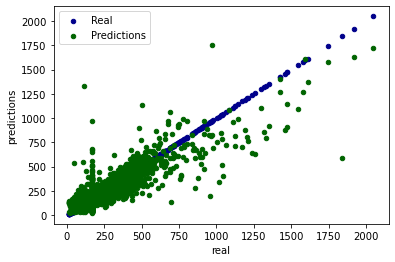

In [60]:
ax = df1.plot.scatter(x="real",y=0, color="DarkBlue", label="Real")
df1.plot.scatter(x=0, y="predictions", color="DarkGreen", label="Predictions", ax=ax)

In [62]:
np.mean((predicted_aqi-y_test)**2)

3153.013364577546

In [63]:
reg.score(x_test,y_test)*100

80.87807131711199